In [ ]:
import pandas as pd
import numpy as np
# Visualization libraries
import seaborn as sns  # For statistical data visualization
import matplotlib.pyplot as plt  # For basic plotting
import plotly.express as px  # For interactive plots
import plotly.graph_objects as go  # For detailed interactive plots
# Data preprocessing and model evaluation
from sklearn.model_selection import train_test_split  # For splitting data into training and testing sets
from sklearn.preprocessing import StandardScaler, OneHotEncoder  # For feature scaling and encoding categorical variables
from sklearn.compose import ColumnTransformer  # For combining different preprocessing steps
from sklearn.pipeline import Pipeline  # For creating a sequence of data processing steps
from sklearn.impute import SimpleImputer  # For handling missing values
# Machine learning models
from sklearn.linear_model import LinearRegression  # For linear regression model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score  # For evaluating model performance
from sklearn.tree import DecisionTreeRegressor  # For decision tree regression model
from sklearn.ensemble import RandomForestRegressor  # For random forest regression model
from sklearn.svm import SVR  # For support vector regression model
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd
# Additional library import for ColumnTransformer (redundant but might be for clarity in some contexts)
from sklearn.compose import ColumnTransformer  # For applying different preprocessing pipelines to different subsets of features


In [ ]:
## reading the data
data = pd.read_csv('/content/robot.csv')
data

,Robot,Embodiment,Mobility,Total number of dof,Manipulator type,DoF Manipulator,Height,Length,Width,Diameter,...,Commercially available,Social Software Capabilities,Sensors,Interaction modalities,Face,Software Extension Capability,total number of associated papers,year,robot number,modality number
0,NAO V6,['humanoid'],fully-mobile,25.0,functional,12,574.0,311.0,275.0,NaN,...,available,"['preprogrammed behaviors', 'object recognitio...","['camera', 'microphone', 'force', 'ultrasonic'...","['speech', 'gesture', 'body movement', 'head m...",['LED features'],"interface available, support ROS",67,2004.0,11,5
1,Pepper,['humanoid'],fully-mobile,19.0,functional,10,1200.0,425.0,485.0,NaN,...,available,"['preprogrammed behaviors', 'object recognitio...","['camera', 'depth camera', 'microphone', 'touc...","['speech', 'tactile', 'touch screen', 'body mo...",['LED features'],"interface available, support ROS",29,2014.0,23,7
2,Robovie,['humanoid'],fully-mobile,18.0,gesture,8,1200.0,NaN,NaN,400.0,...,used to be available,"['autonomous navigation', 'speech recognition'...","['touch', 'laser', 'microphone', 'ultrasonic']","['tactile', 'body movement', 'head movement', ...",['partly-actuated'],not mentioned,27,2002.0,4,5
3,AIBO,['animal-like'],fully-mobile,12.0,NaN,0,180.0,293.0,305.0,NaN,...,available,"['autonomous navigation', 'speech recognition'...","['camera', 'microphone']","['speech', 'gesture', 'body movement']","['screen', 'partly-actuated']",support ROS,10,1999.0,1,3
4,PeopleBot,"['mechanoid', 'abstract']",fully-mobile,8.0,NaN,0,1240.0,470.0,380.0,NaN,...,available,"['speech synthesis', 'speech recognition', 'ob...","['ultrasonic', 'microphone', 'IR']","['speech', 'body movement']",['x'],not mentioned,9,2000.0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
337,Ava,['mechanoid'],fully-mobile,5.0,NaN,0,1650.0,575.0,575.0,NaN,...,available,"['autonomous navigation', 'teleoperation', 'pr...","['laser', 'depth camera']","['body movement', 'tactile']",['screen'],library/API available,0,2018.0,22,2
338,Temi,"['mechanoid', 'abstract']",fully-mobile,NaN,NaN,0,1000.0,450.0,350.0,NaN,...,available,"['teleoperation', 'autonomous navigation', 'pr...","['laser', 'camera', 'touch']","['body movement', 'speech', 'touch screen']",['screen'],library/API available,0,2018.0,22,3
339,LOVOT,['biomimetic'],fully-mobile,13.0,gesture,-1,430.0,260.0,280.0,NaN,...,available,"['speech recognition', 'speech synthesis', 'au...","['camera', 'depth camera', 'microphone', 'temp...","['body movement', 'speech', 'tactile', 'eye mo...",['LED features'],not mentioned,0,2018.0,22,4
340,Surena,['humanoid'],fully-mobile,43.0,functional,28,1700.0,NaN,NaN,NaN,...,not available,"['preprogrammed behaviors', 'speech recognitio...","['camera', 'microphone', 'depth camera']","['body movement', 'head movement', 'gesture', ...",['static'],Support ROS,0,2019.0,13,5


In [ ]:
## data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 342 entries, 0 to 341
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Robot                              342 non-null    object 
 1   Embodiment                         342 non-null    object 
 2   Mobility                           342 non-null    object 
 3   Total number of dof                262 non-null    float64
 4   Manipulator type                   197 non-null    object 
 5   DoF Manipulator                    342 non-null    int64  
 6   Height                             205 non-null    float64
 7   Length                             94 non-null     float64
 8   Width                              115 non-null    float64
 9   Diameter                           19 non-null     float64
 10  Weight                             342 non-null    float64
 11  Shell material type                342 non-null    object 

In [ ]:
## checking the null values
data.isnull().sum()

,0
Robot,0
Embodiment,0
Mobility,0
Total number of dof,80
Manipulator type,145
DoF Manipulator,0
Height,137
Length,248
Width,227
Diameter,323


In [ ]:
## data summary
data.describe()

,Total number of dof,DoF Manipulator,Height,Length,Width,Diameter,Weight,total number of associated papers,year,robot number,modality number
count,262.000000,342.000000,205.000000,94.000000,115.000000,19.000000,342.000000,342.000000,341.000000,342.000000,342.000000
mean,16.446565,5.599415,965.702439,434.840426,465.713043,395.105263,21.784363,1.774854,2011.152493,18.733918,3.207602
std,16.153093,9.106750,566.305419,288.584469,348.014513,302.242525,45.145201,4.343622,6.407273,6.143634,1.489219
min,0.000000,-1.000000,25.000000,60.000000,53.000000,25.000000,-1.000000,0.000000,1950.000000,0.000000,0.000000
25%,4.000000,0.000000,390.000000,190.000000,232.500000,117.500000,-1.000000,1.000000,2007.000000,14.750000,2.000000
50%,11.000000,0.000000,1020.000000,368.000000,450.000000,380.000000,0.500000,1.000000,2012.000000,20.000000,3.000000
75%,23.000000,8.000000,1467.000000,600.000000,598.500000,536.500000,23.750000,2.000000,2016.000000,22.000000,4.000000
max,83.000000,52.000000,2000.000000,1850.000000,2600.000000,1180.000000,300.000000,67.000000,2020.000000,27.000000,9.000000


In [ ]:
# 1. Bar Chart: Total number of DOF for each robot
fig_dof = px.bar(data, x='Robot', y='Total number of dof', title='Total Number of DOF for Each Robot')
fig_dof.show()

In [ ]:
# 2. Scatter Plot: Robot height vs. year of introduction
fig_height_year = px.scatter(data, x='year', y='Height', text='Robot', title='Robot Height vs. Year of Introduction')
fig_height_year.update_traces(textposition='top center')
fig_height_year.show()


In [ ]:
# 3. Pie Chart: Distribution of robots by commercial availability
fig_availability = px.pie(data, names='Commercially available', title='Distribution of Robots by Commercial Availability')
fig_availability.show()

In [ ]:
# 4. Histogram: Number of associated papers
fig_papers = px.histogram(data, x='total number of associated papers', title='Number of Associated Papers')
fig_papers.show()

In [ ]:
# Flatten the list columns for pie charts
data = data.explode('Embodiment')
# Visualization examples using Plotly
#  Pie Chart: Distribution of robots by embodiment type
fig_embodiment = px.pie(data, names='Embodiment', title='Distribution of Robots by Embodiment Type')
plt.savefig('Distribution of Robots by Embodiment Type')
fig_embodiment.show()

<Figure size 640x480 with 0 Axes>

In [ ]:
#  Pie Chart: Distribution of robots by mobility type
fig_mobility = px.pie(data, names='Mobility', title='Distribution of Robots by Mobility Type')
fig_mobility.show()


In [ ]:
# Histogram: Height distribution of robots
fig_height = px.histogram(data, x='Height', title='Height Distribution of Robots')
fig_height.show()

In [ ]:
# Histogram: Length distribution of robots
fig_length = px.histogram(data, x='Length', title='Length Distribution of Robots')
fig_length.show()

In [ ]:
## dropping duplicates
data.drop_duplicates(inplace=True)

In [ ]:
# Flatten the list columns for simplicity in preprocessing
data['Embodiment'] = data['Embodiment'].apply(lambda x: x[0] if isinstance(x, list) else x)
data['Social Software Capabilities'] = data['Social Software Capabilities'].apply(lambda x: x[0] if isinstance(x, list) else x)
data['Sensors'] = data['Sensors'].apply(lambda x: x[0] if isinstance(x, list) else x)
data['Interaction modalities'] = data['Interaction modalities'].apply(lambda x: x[0] if isinstance(x, list) else x)
data['Face'] = data['Face'].apply(lambda x: x[0] if isinstance(x, list) else x)

In [ ]:
# Feature columns and target
features = data.drop(['Robot', 'total number of associated papers'], axis=1)
target = data['total number of associated papers']

# Preprocessing pipeline for numerical and categorical features
numeric_features = features.select_dtypes(include=['int64', 'float64']).columns
categorical_features = features.select_dtypes(include=['object']).columns

In [ ]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

In [ ]:
# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Preprocess the data
X_preprocessed = preprocessor.fit_transform(features)
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, target, test_size=0.2, random_state=42)

In [ ]:
# 2. T-test: Compare the mean number of papers published in two different time periods
# Example: Compare number of papers before and after the year 2010
data['period'] = data['year'].apply(lambda x: 'Before 2010' if x < 2010 else 'After 2010')
# Perform t-test
before_2010 = data[data['period'] == 'Before 2010']['total number of associated papers']
after_2010 = data[data['period'] == 'After 2010']['total number of associated papers']
t_stat, p_value = stats.ttest_ind(before_2010, after_2010)
print(f"T-test results: t-statistic = {t_stat}, p-value = {p_value}")

T-test results: t-statistic = 2.5254447660549646, p-value = 0.012009145641642936


In [ ]:
# 4. Chi-Square Test: Association between Mobility and Commercial Availability
contingency_table = pd.crosstab(data['Mobility'], data['Commercially available'])
chi2_stat, p, dof, expected = stats.chi2_contingency(contingency_table)
print(f"Chi-Square Test: chi2_stat = {chi2_stat}, p-value = {p}")

Chi-Square Test: chi2_stat = 36.677703299547645, p-value = 0.0008253047696120526


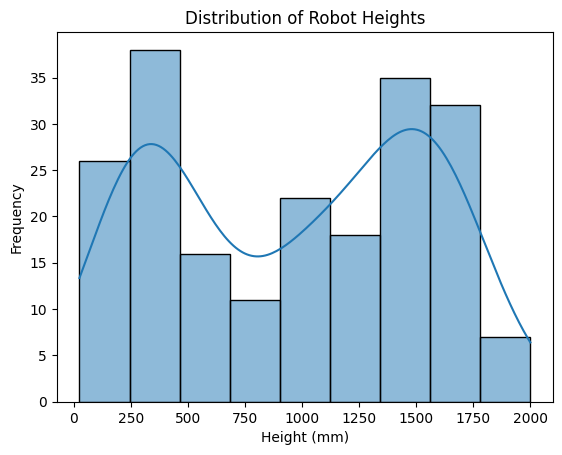

In [ ]:
# 5. Visualize the distribution of robot heights
sns.histplot(data['Height'], kde=True)
plt.title('Distribution of Robot Heights')
plt.xlabel('Height (mm)')
plt.ylabel('Frequency')
plt.show()

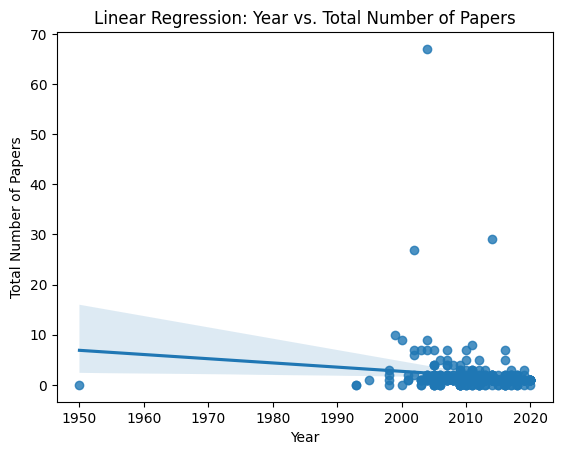

In [ ]:
# 6. Linear Regression: Relationship between total number of papers and year
sns.regplot(x='year', y='total number of associated papers', data=data)
plt.title('Linear Regression: Year vs. Total Number of Papers')
plt.xlabel('Year')
plt.ylabel('Total Number of Papers')
plt.show()


In [ ]:
# Clean and preprocess the data
data = data.dropna(subset=['Height', 'Embodiment'])  # Drop rows with missing Height or Embodiment values

# Group by Embodiment and filter out those with fewer than two data points
filtered_df = data.groupby('Embodiment').filter(lambda x: len(x) > 1)

# List unique embodiments after filtering
embodiment_groups = filtered_df['Embodiment'].unique()

# Prepare data for ANOVA and Kruskal-Wallis
anova_data = [filtered_df[filtered_df['Embodiment'] == embodiment]['Height'] for embodiment in embodiment_groups]

# 1. ANOVA
anova_result = stats.f_oneway(*anova_data)
print(f"ANOVA results: F-statistic = {anova_result.statistic}, p-value = {anova_result.pvalue}")

# 2. Kruskal-Wallis H-test (Non-parametric alternative to ANOVA)
kruskal_result = stats.kruskal(*anova_data)
print(f"Kruskal-Wallis results: H-statistic = {kruskal_result.statistic}, p-value = {kruskal_result.pvalue}")

# 3. Tukey's HSD (post-hoc test after ANOVA)
tukey_result = pairwise_tukeyhsd(endog=filtered_df['Height'],
                                 groups=filtered_df['Embodiment'],
                                 alpha=0.05)
print(tukey_result)

ANOVA results: F-statistic = 3.883970261810364, p-value = 4.558272697594049e-05
Kruskal-Wallis results: H-statistic = 36.172114272881956, p-value = 0.0001584361744999667
                        Multiple Comparison of Means - Tukey HSD, FWER=0.05                        
          group1                     group2            meandiff  p-adj    lower      upper   reject
---------------------------------------------------------------------------------------------------
 ['abstract', 'mechanoid']               ['abstract']   -501.375 0.9623 -1686.9414  684.1914  False
 ['abstract', 'mechanoid']                ['android']   121.1667    1.0 -1117.1171 1359.4504  False
 ['abstract', 'mechanoid']            ['animal-like']  -519.5714 0.9262 -1633.6991  594.5563  False
 ['abstract', 'mechanoid'] ['biomimetic', 'abstract']     -928.0 0.7444 -2526.6174  670.6174  False
 ['abstract', 'mechanoid']             ['biomimetic']  -716.9375  0.585 -1818.7085  384.8335  False
 ['abstract', 'mechanoid']    

In [ ]:
# Train the model
model = LinearRegression()
model.fit(X_train, y_train)
# Predict on the test set
y_pred = model.predict(X_test)
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print('Linear Regression')
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")



Linear Regression
Mean Squared Error (MSE): 5.639283527616918
Root Mean Squared Error (RMSE): 2.3747175679682244
Mean Absolute Error (MAE): 1.8385592205680568


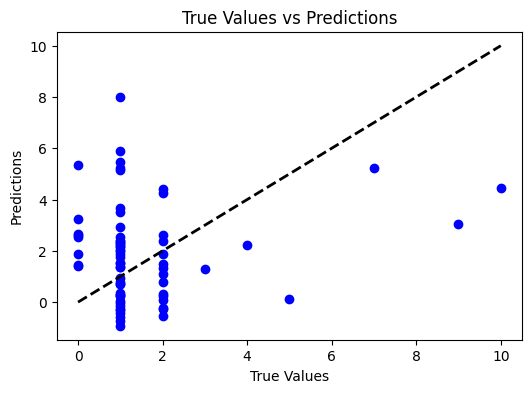

In [ ]:
# Plotting true vs predicted values
plt.figure(figsize=(6,4))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True Values vs Predictions')
plt.show()

In [ ]:
# Define the models
models = { 'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Support Vector Regressor': SVR(kernel='linear')
}

# Train and evaluate the models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)


    print(f"{name}:")
    print(f"  Mean Squared Error (MSE): {mse}")
    print(f"  Root Mean Squared Error (RMSE): {rmse}")
    print(f"  Mean Absolute Error (MAE): {mae}")



Decision Tree:
  Mean Squared Error (MSE): 4.7101449275362315
  Root Mean Squared Error (RMSE): 2.1702868307060776
  Mean Absolute Error (MAE): 0.9420289855072463
Random Forest:
  Mean Squared Error (MSE): 3.882182608695652
  Root Mean Squared Error (RMSE): 1.9703255083096427
  Mean Absolute Error (MAE): 1.0078260869565219
Support Vector Regressor:
  Mean Squared Error (MSE): 3.3659380778172987
  Root Mean Squared Error (RMSE): 1.8346493064935594
  Mean Absolute Error (MAE): 1.2009796837552271


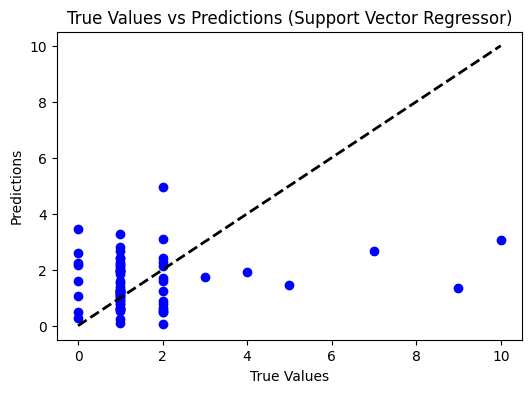

In [ ]:
# Plotting true vs predicted values
plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title(f'True Values vs Predictions ({name})')
plt.show()

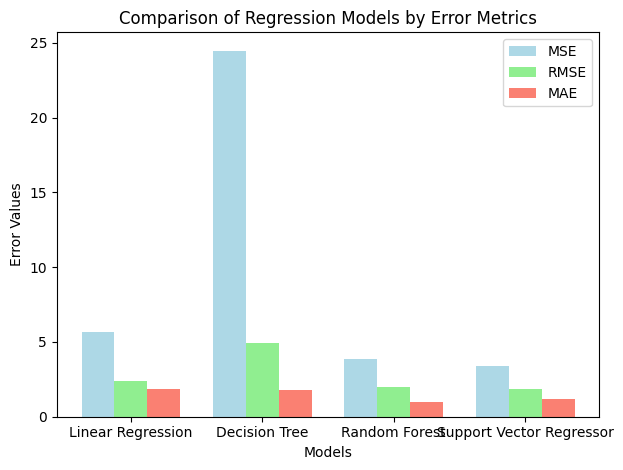

In [ ]:
# Define the models and their corresponding values
models = ['Linear Regression', 'Decision Tree', 'Random Forest', 'Support Vector Regressor']
mse_values = [5.639260146179849, 24.47826086956522, 3.882182608695652, 3.3659380778172987]
rmse_values = [2.374712644969881, 4.947550997166701, 1.9703255083096427, 1.8346493064935594]
mae_values = [1.8385588053028277, 1.7536231884057971, 1.0078260869565219, 1.2009796837552271]
# Set the bar width
bar_width = 0.25
x = np.arange(len(models))  # The label locations
# Create the bar plots for each metric
plt.bar(x - bar_width, mse_values, width=bar_width, label='MSE', color='lightblue')
plt.bar(x, rmse_values, width=bar_width, label='RMSE', color='lightgreen')
plt.bar(x + bar_width, mae_values, width=bar_width, label='MAE', color='salmon')
# Add some text for labels, title, and custom x-axis tick labels, etc.
plt.xlabel('Models')
plt.ylabel('Error Values')
plt.title('Comparison of Regression Models by Error Metrics')
plt.xticks(x, models)
plt.legend()
# Display the plot
plt.tight_layout()  # Adjust the layout to make room for the legend
plt.show()

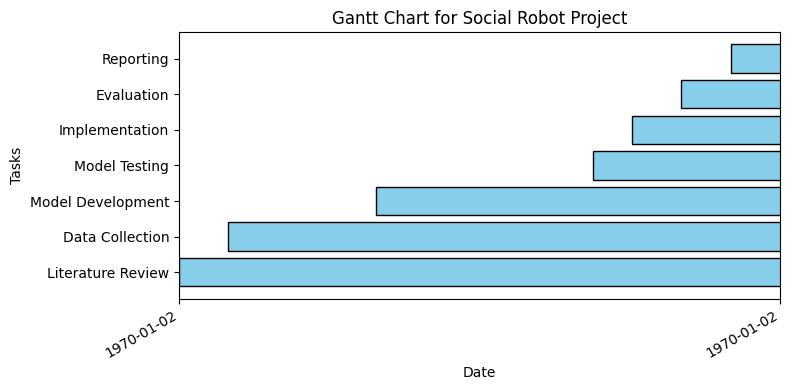

In [ ]:
import matplotlib.dates as mdates

# Define the data for the Gantt chart
tasks = {
    'Task': [
        'Literature Review',
        'Data Collection',
        'Model Development',
        'Model Testing',
        'Implementation',
        'Evaluation',
        'Reporting'
    ],
    'Start': [
        '2024-06-20',
        '2024-06-25',
        '2024-07-10',
        '2024-08-01',
        '2024-08-05',
        '2024-08-10',
        '2024-08-15'
    ],
    'End': [
        '2024-06-30',
        '2024-07-05',
        '2024-08-01',
        '2024-08-05',
        '2024-08-10',
        '2024-08-15',
        '2024-08-20'
    ]
}

# Create a DataFrame
df = pd.DataFrame(tasks)

# Convert start and end dates to datetime
df['Start'] = pd.to_datetime(df['Start'])
df['End'] = pd.to_datetime(df['End'])
df['Duration'] = (df['End'] - df['Start']).dt.days

# Plotting the Gantt chart
plt.figure(figsize=(8,4))

# Create bars for each task
for i, task in enumerate(df['Task']):
    plt.barh(task, df['Duration'][i], left=df['Start'][i].timestamp() / 1e9, color='skyblue', edgecolor='black')

# Formatting the chart
plt.xlabel('Date')
plt.ylabel('Tasks')
plt.title('Gantt Chart for Social Robot Project')

# Set x-axis limits
plt.xlim(pd.Timestamp('2024-06-20').timestamp() / 1e9, pd.Timestamp('2024-08-20').timestamp() / 1e9)

# Format the x-axis to show dates
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=3))  # Set interval for major ticks
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # Set date format

# Rotate the date labels for better readability
plt.gcf().autofmt_xdate()

# Show the Gantt chart
plt.tight_layout()
plt.grid(axis='x')
plt.show()